In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [4]:
# Aggregate the login times to 15 minutes intervals as well as count how many logins were within the intervales
logins.set_index('login_time', inplace=True)
logins['count'] = 1
logins.sort_index(inplace=True)
logins = logins.resample('15T').count()
logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<AxesSubplot:xlabel='login_time'>

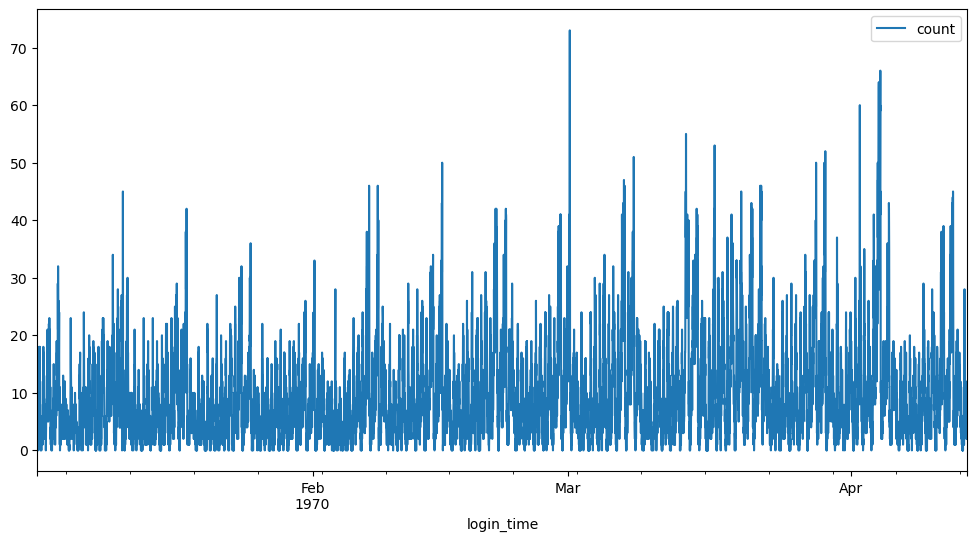

In [5]:
logins.plot(kind='line',figsize=(12,6))

It does look like there is an underlying pattern in the data, but it is hard to see at this scale. Steps need to be taken to better understand the data.

In [6]:
# Aggregate by day of the week and time of day.
logins['day_name'] = logins.index.map(lambda x:x.day_name())
logins['dayofweek'] = logins.index.map(lambda x:x.dayofweek)
logins['hour'] = logins.index.map(lambda x:x.hour)

In [7]:
logins.head()

,count,day_name,dayofweek,hour
login_time,,,,
1970-01-01 20:00:00,2,Thursday,3,20
1970-01-01 20:15:00,6,Thursday,3,20
1970-01-01 20:30:00,9,Thursday,3,20
1970-01-01 20:45:00,7,Thursday,3,20
1970-01-01 21:00:00,1,Thursday,3,21


<AxesSubplot:xlabel='dayofweek,day_name'>

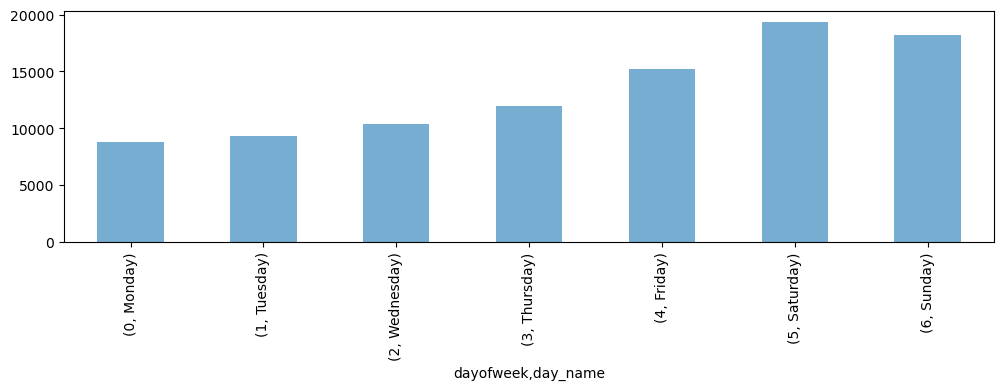

In [8]:
logins_dayofweek = logins.groupby(["dayofweek", "day_name"])['count'].sum()
logins_dayofweek.plot.bar(x='day_name', y='count', alpha=0.6, figsize=(12,3))

The number of Mondays is the smallest, increasing gradually and peaking on Saturday. There are relatively many weekends.



<AxesSubplot:xlabel='hour'>

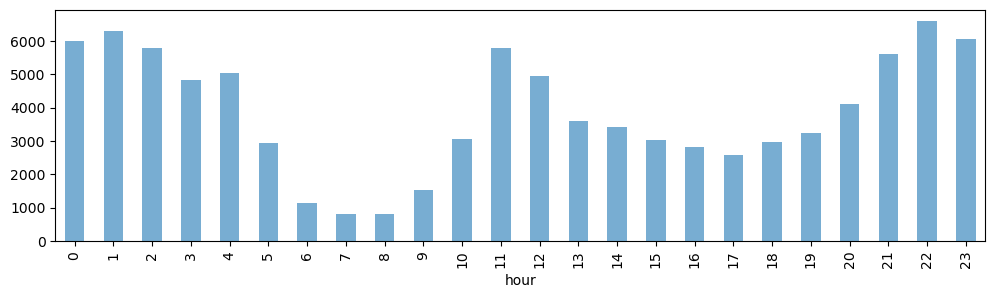

In [9]:

logins_hour = logins.groupby(["hour"])['count'].sum()
logins_hour.plot.bar(x='hour', y='count', alpha=0.6, figsize=(12,3))


# Part 1

Based on both the distributions shown above with 1 hour time interval and days for the login times, it appears that business generally increases at midnight and the next is around 11 am to noon and also from 9pm to late night. The number from 7am to 8am is the smallest.

The number of Mondays is the smallest, increasing gradually and peaking on Saturday. There are relatively many weekends.

In [10]:

logins.describe()

,count,dayofweek,hour
count,9788.000000,9788.000000,9788.000000
mean,9.515938,3.035554,11.496935
std,8.328818,2.012722,6.922294
min,0.000000,0.000000,0.000000
25%,3.000000,1.000000,5.000000
50%,7.000000,3.000000,11.000000
75%,13.000000,5.000000,17.000000
max,73.000000,6.000000,23.000000


In [11]:
 logins_hour.describe()

count      24.000000
mean     3880.916667
std      1803.481559
min       815.000000
25%      2916.750000
50%      3518.500000
75%      5667.000000
max      6607.000000
Name: count, dtype: float64

In [12]:
logins_dayofweek.describe()

count        7.000000
mean     13306.000000
std       4303.516082
min       8823.000000
25%       9803.500000
50%      11960.000000
75%      16687.500000
max      19377.000000
Name: count, dtype: float64

# Part 2

Question 1: What would you choose as the key measure of success of this experiment in

In order to measure the success of this experiment, I would look at time in which the toll ticket was given to the driver, in conjunction to the time the driver was active within the service app. This will ensure that the drivers who are looking for reimbursement of their toll ticket during "active" hours are receiving it accordingly.

Question 2:Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

A) Considering the drivers reside in either one side of the bridhe or the other, they will have to be reimbursed twice (since it's a two way toll). Therefore, we can get enough information from drivers of each side of the bridge to see how well the experiment is working.
B-C) t-test as  a good statiscal test to observe how two groups differ from each other. I would then create a hypothesis to further deduce whether or not the experiment is significant. Null Hypothesis: The true difference of the mean of tickets acquired by driver partners of each city differs from 0 Alternate: The true difference of the mean of tickets acquired by driver partners of each city is is equal to 0

If the Null Hypthosesis is true, that means that in one city there are more people utilizing the toll reimbursement program. If the Alternate is true, it either means that both the cities aren't utilizing the toll reimbursement program or that they are utilizing it equally (this can easily be dilineated by looking to see if drivers have turned in toll tickets.)


In [13]:
trips = pd.read_json('ultimate_data_challenge.json')
trips.head(20)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [14]:
trips.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [15]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [16]:
# Convert these columns to datetime

trips['signup_date'] = pd.to_datetime(trips.signup_date)
trips['last_trip_date'] = pd.to_datetime(trips.last_trip_date)

In [17]:
trips.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [18]:
# Identify when were the most recent trips.
#trips = trips.sort_values('last_trip_date', ascending= False)

In [19]:
#trips.head()

In [20]:
#find if user qualifies as active
current_date = trips['last_trip_date'].max()

trips['active'] = trips['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
trips.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [21]:
# Check for any missing data

print(trips.isnull().any())
print(trips.isnull().any().count())

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver       True
avg_surge                 False
last_trip_date            False
phone                      True
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver       True
active                    False
dtype: bool
13


We see that avg_rating_of_driver and avg_rating_by_driver and phone has missing values.Going to fill with mean and appropriate values .

In [22]:
avg_rating_by_driver_mean = trips['avg_rating_by_driver'].mean()
avg_rating_of_driver_mean = trips['avg_rating_of_driver'].mean()

In [23]:
trips['avg_rating_by_driver'].fillna(avg_rating_by_driver_mean,inplace=True)
trips['avg_rating_of_driver'].fillna(avg_rating_of_driver_mean,inplace=True)
trips['phone'].fillna('Other', inplace=True)


In [24]:
trips.isnull().any()


city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver      False
avg_surge                 False
last_trip_date            False
phone                     False
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver      False
active                    False
dtype: bool

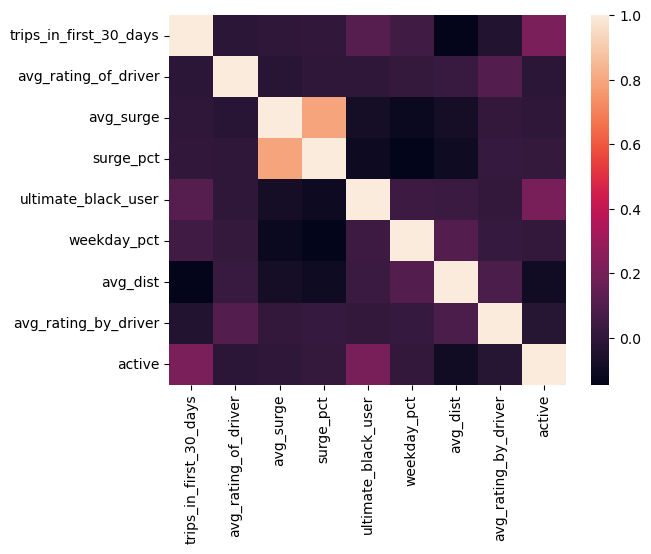

In [25]:
corr = trips.corr()
ax = sns.heatmap(corr)
plt.show()

In [26]:
corr['active'].sort_values(ascending=False)


active                    1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.010829
avg_rating_by_driver     -0.026748
avg_dist                 -0.092780
Name: active, dtype: float64

"trips_in_first_30_days" and "ultimate_black_user" are slightly correlated with "retained".



<AxesSubplot:xlabel='active', ylabel='avg_dist'>

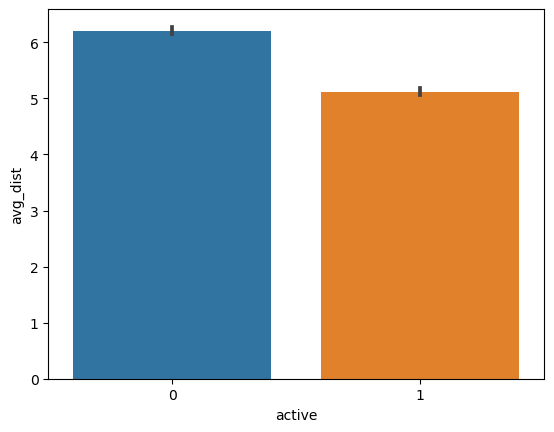

In [27]:
#visualize difference in average distance by activity of user
sns.barplot(data=trips,x='active',y='avg_dist')


There is a difference in the average distance per trip taken in the first 30 days between active users and inactive users, this will be important for predictive modeling.

The average rating by by driver will probably be informative, let's plot it for active vs inactive users.

<AxesSubplot:xlabel='active', ylabel='avg_rating_by_driver'>

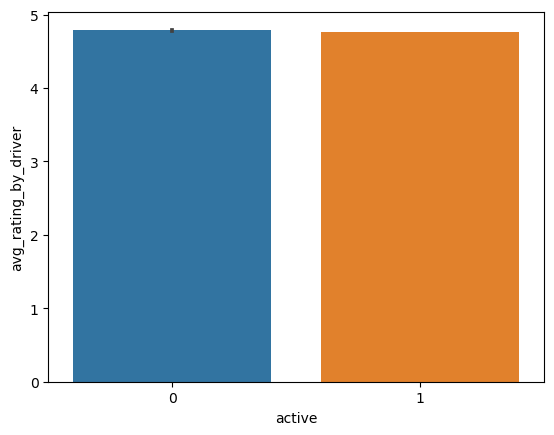

In [28]:
sns.barplot(data=trips,x='active',y='avg_rating_by_driver')


Feature Engineering

In [29]:
trips = pd.get_dummies(trips,columns=['city','phone'])


In [30]:
trips.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0,0


In [31]:
trips = trips.drop(columns = ['signup_date', "last_trip_date","trips_in_first_30_days"])
trips["ultimate_black_user"] = trips["ultimate_black_user"].astype(int)


#ss = StandardScaler()

#trips.weekday_pct = ss.fit_transform(trips[['weekday_pct']])
#trips.surge_pct = ss.fit_transform(trips[['surge_pct']])

In [32]:
trips.head()

,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
0,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,1,0,0,0,1
1,5.0,1.00,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0,0,0,1
3,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,1,0,0,0,1
4,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0,0


# Preprocessing/Modeling

In [33]:
y = trips['active']
X = trips.drop(columns = ['active'])

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7954 1425]
 [2992 2629]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      9379
           1       0.65      0.47      0.54      5621

    accuracy                           0.71     15000
   macro avg       0.69      0.66      0.66     15000
weighted avg       0.70      0.71      0.69     15000



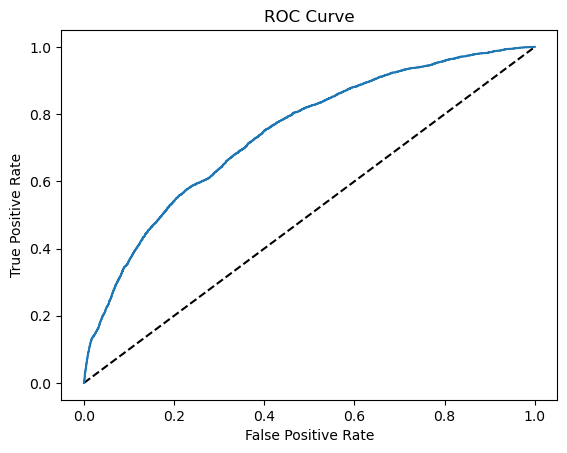

In [35]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.7422640798800304
AUC scores computed using 5-fold cross-validation: [0.74579562 0.73690235 0.73258605 0.74036184 0.74773429]


In [37]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7042599999999999


In [38]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
# split data into train and test sets
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Text(0, 0.5, 'Feature Importance Score')

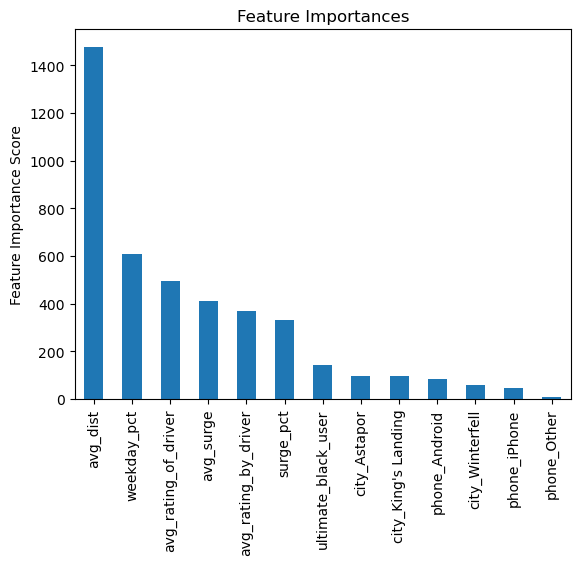

In [40]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [41]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.01%


# Part 3

We have built a predictive model with 78% accuracy, that will be useful for future prediction.

For the model, we initially used logistic regression as it is a solid predictor of binary classification. To improve the accuracy we could  normalize the features to minimize any bias from different scales.We used XGBoost which gave better accuracy compared to Logistic Regression.

Few insights we got from the data are:

1. avg_dist-  average distance was the most important feature. This implies that users who use the service for local, smaller trips are most likely to engage frequently and remain active.Focusing retention campaigns on those local users will help.
2. weekday_pct -The chance of being an active user increase as the percentage of week day use goes up. From this we can see that encouraging people to use the app on the weekdays will be beneficial for the company revenue.
3. Based on EDA and our modeling, the type of Phone used seems to matter. There is less retention with users using other than iphones.
